# Assessment 3: WebCrawler and NLP System

## Task 1: Overview

### a. An overview of the Issue

Customer sentiment analysis of Amazon product reviews is a critical component of modern business intelligence. In the highly competitive e-commerce landscape, understanding customer opinions is paramount for product improvement, marketing strategy, and overall brand perception. The issue at hand involves extracting meaningful insights from the vast pool of customer reviews on Amazon to gauge sentiment and identify areas for enhancement.

### b. Where the Issue is present on the world wide web

The issue is prominently present on Amazon, one of the world's largest and most diverse online marketplaces. Amazon hosts an extensive collection of customer reviews spanning various product categories, making it an invaluable source for understanding customer sentiment. The reviews encompass a wide range of opinions, from product features and quality to customer service experiences.

### c. How machine learning can be applied to provide a solution to the Issue

Machine learning (ML) serves as a powerful tool for automating sentiment analysis tasks, allowing for the efficient processing of large volumes of unstructured text data. By leveraging NLP there are multiple ways to identify usefull information that can help business understand the customer requirements/sentiment etc..

One of the common ways is by leveraging natural language processing (NLP) techniques where ML models can categorize reviews into positive, negative, or neutral sentiments. This automated approach enables businesses to derive actionable insights from the wealth of customer feedback on Amazon and get an general opinion of the product.

More advaned ML models can go beyond simple sentiment classification. They can identify specific aspects of products that customers appreciate or criticize, providing a nuanced understanding of strengths and weaknesses. This granular analysis can guide product development and marketing strategies, contributing to improved customer satisfaction and brand loyalty.

## Task 2: Web Crawler and Data Collection

In [1]:
# Import the required libraries
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime
import time
import pandas as pd

In [2]:
# Web Crawler
# Define a header
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

# Define some parameters to determine amount to data collection
page_number = 150 # No. of page numbers to go through
max_products = 1000 # Max number product ids to get
product_ids = dict() # Define a empty dict to store product ids and its product name

for page in range(1,page_number+1):
    # Get the details from the website
    response = requests.get(f'https://www.amazon.com.au/s?k=Board+Games&i=toys&rh=n%3A5030765051&page={page}&c=ts&qid=1701414763&ts_id=5030765051&ref=sr_pg_2', headers=headers)       
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        all_a = soup.find_all('a', class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal')
        for each_a in all_a:
            each_a_details = each_a.attrs['href'].split('/')
            if each_a_details[1] != '':
                    product_ids[each_a_details[3]] = each_a_details[1]
    else:
        time.sleep(2)
        response = requests.get(f'https://www.amazon.com.au/s?k=Board+Games&i=toys&rh=n%3A5030765051&page={page}&c=ts&qid=1701414763&ts_id=5030765051&ref=sr_pg_2', headers=headers)       
    
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            all_a = soup.find_all('a', class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal')
            for each_a in all_a:
                each_a_details = each_a.attrs['href'].split('/')
                if each_a_details[1] != '':
                    product_ids[each_a_details[3]] = each_a_details[1]
        else:
            print(f'Page: {page} Status Code: {response.status_code}')
        
    if len(product_ids) >= max_products:
        break

Page: 2 Status Code: 503
Page: 4 Status Code: 503
Page: 5 Status Code: 503
Page: 7 Status Code: 503
Page: 9 Status Code: 503
Page: 11 Status Code: 503
Page: 15 Status Code: 503
Page: 16 Status Code: 503
Page: 17 Status Code: 503
Page: 21 Status Code: 503
Page: 22 Status Code: 503
Page: 25 Status Code: 503
Page: 28 Status Code: 503
Page: 31 Status Code: 503
Page: 32 Status Code: 503
Page: 33 Status Code: 503
Page: 35 Status Code: 503
Page: 38 Status Code: 503
Page: 39 Status Code: 503
Page: 41 Status Code: 503
Page: 42 Status Code: 503
Page: 45 Status Code: 503
Page: 46 Status Code: 503
Page: 52 Status Code: 503
Page: 55 Status Code: 503
Page: 56 Status Code: 503
Page: 58 Status Code: 503
Page: 60 Status Code: 503
Page: 69 Status Code: 503
Page: 72 Status Code: 503
Page: 74 Status Code: 503
Page: 76 Status Code: 503
Page: 77 Status Code: 503
Page: 78 Status Code: 503


In [34]:
len(product_ids)

1001

In [40]:
# Define some function
def review_title(review_container):
    return review_container.find('span', 
                                 {'class': 'a-size-base review-title a-color-base review-title-content a-text-bold', 'data-hook': 'review-title'}).get_text(strip=True)

def review_rating(review_container):
    rating_icon = review_container.find('i', 
                                             {'class': 'a-icon a-icon-star a-star-5 review-rating', 
                                              'data-hook': 'cmps-review-star-rating'})
    # Extract the text content of the span inside the i element
    rating_text = rating_icon.find('span', {'class': 'a-icon-alt'}).get_text(strip=True)

    return float(rating_text.split()[0])

def review_date(date_element):
    # Extract and parse the review date
    date_str = date_element.get_text(strip=True)
    date_match = re.search(r'on\s+(.*)$', date_str)
    
    if date_match:
        date_str = date_match.group(1)
        return datetime.strptime(date_str, '%d %B %Y').date()

def review_text(review_container):
    # Find the div element with the specified class
    review_div = review_container.find('div', {'class': 'a-row a-spacing-small review-data'})

    # Find the span element with the specified class and data-hook attribute inside the div
    review_text_span = review_div.find('span', {'class': 'a-size-base review-text review-text-content', 'data-hook': 'review-body'})

    # Extract the text content of the span
    return review_text_span.get_text(strip=True)

reviews = [] # To store reviews

# Now we collect the product reviews using the product ids
for product_id, name_of_product in product_ids.items():
    url = f'https://www.amazon.com.au/product-reviews/{product_id}/ref=cm_cr_arp_d_paging_btm_next_2?sortBy=recent'
    
    # Defin some parameters and variable to store data
    page_number = 1
    max_reviews = 5000
    max_page_check = 0
    
    while len(reviews) < max_reviews:
        page_url = f"{url}&pageNumber={page_number}"
        time.sleep(1)
        try:
            response = requests.get(page_url, headers=headers, timeout=1.0)
        except:
            pass
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            review_containers = soup.find_all('div', class_='a-section review aok-relative')

            if not review_containers:
                break  # No more reviews on the page

            for review_container in review_containers:
                review = {}
                try:
                    # Extract relevant information from the review container
                    review['product_id'] = product_id
                    review['title'] = review_title(review_container)
                    review['rating'] = review_rating(review_container)
                    review['date'] = review_date(review_container.find('span', class_='a-size-base a-color-secondary review-date'))
                    review['text'] = review_text(review_container)
                    reviews.append(review)
                except:
                    pass
                
                if len(reviews) >= max_reviews:
                    break

        else:
            print(f'Error Accessing Page: {page_number} of product id: {product_id} due to {response.status_code}')
            max_page_check += 1
            
        page_number += 1
            
        if max_page_check >= 5:
            break

Error Accessing Page: 3 of product id: B089KV9RX7 due to 404
Error Accessing Page: 4 of product id: B089KV9RX7 due to 404
Error Accessing Page: 5 of product id: B089KV9RX7 due to 404
Error Accessing Page: 6 of product id: B089KV9RX7 due to 404
Error Accessing Page: 7 of product id: B089KV9RX7 due to 404
Error Accessing Page: 2 of product id: B00A2HD40E due to 404
Error Accessing Page: 3 of product id: B00A2HD40E due to 404
Error Accessing Page: 4 of product id: B00A2HD40E due to 404
Error Accessing Page: 5 of product id: B00A2HD40E due to 404
Error Accessing Page: 6 of product id: B00A2HD40E due to 404
Error Accessing Page: 1 of product id: B07GVVCRFV due to 404
Error Accessing Page: 2 of product id: B07GVVCRFV due to 404
Error Accessing Page: 3 of product id: B07GVVCRFV due to 404
Error Accessing Page: 2 of product id: B0BS8VSKXS due to 404
Error Accessing Page: 2 of product id: B00005K423 due to 404
Error Accessing Page: 2 of product id: B013TJ5P80 due to 404
Error Accessing Page: 2 

In [41]:
# Printing some sample data
for review in reviews[:10]:
    print(review)

{'product_id': 'B089KV9RX7', 'title': 'Pequeño y conveniente', 'rating': 5.0, 'date': datetime.date(2023, 12, 2), 'text': 'Me sorprendió el tamaño de la caja, es bastante pequeña, pero resulta práctico para transportarlo. Excelente para 2 jugadores'}
{'product_id': 'B089KV9RX7', 'title': 'Tiny - Stressful - Great', 'rating': 5.0, 'date': datetime.date(2023, 11, 29), 'text': 'Stocking filler for boyfriend, very compact, perfect for travelling'}
{'product_id': 'B089KV9RX7', 'title': 'great purse game', 'rating': 5.0, 'date': datetime.date(2023, 11, 20), 'text': 'Perfect size to throw in a purse and bring places. We have played with groups 2-6 and enjoyed it every time. Good quality. Perfect to add to our game night rotation!'}
{'product_id': 'B089KV9RX7', 'title': 'So much fun!', 'rating': 5.0, 'date': datetime.date(2023, 11, 18), 'text': 'This game is so much fun for a quick game. Not a lot of set up/clean up. Small enough to carry anywhere. Easy to learn and play. Highly recommend!'}
{

In [42]:
len(reviews)

2129

## Task 3: Data Wrangling

In [20]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [44]:
# Convert the data into Pandas DataFrame for better handling of the data
df = pd.DataFrame(reviews)

In [21]:
df = pd.read_csv('scraped_data.csv', index_col=0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, 0 to 2128
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  2129 non-null   object 
 1   title       2129 non-null   object 
 2   rating      2129 non-null   float64
 3   date        2129 non-null   object 
 4   text        2125 non-null   object 
 5   word_count  2129 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 116.4+ KB


In [8]:
df.head()

,product_id,title,rating,date,text,word_count
0,B089KV9RX7,Pequeño y conveniente,5.0,2023-12-02,sorprendió el tamaño de la caja e bastante peq...,18
1,B089KV9RX7,Tiny - Stressful - Great,5.0,2023-11-29,stocking filler boyfriend compact perfect trav...,6
2,B089KV9RX7,great purse game,5.0,2023-11-20,perfect size throw purse bring place played gr...,19
3,B089KV9RX7,So much fun!,5.0,2023-11-18,game much fun quick game lot set upclean small...,17
4,B089KV9RX7,Love it!,5.0,2023-11-18,medium could loadedlove game two four people b...,14


In [83]:
df.to_csv('scraped_data.csv')

### 1. Data Cleaning and Normalization

In [23]:
# Droping missing values
print(df.isna().sum())
df.dropna(inplace=True)

product_id    0
title         0
rating        0
date          0
text          4
word_count    0
dtype: int64


In [24]:
# Convert text to lowercase
df['text'] = df['text'].str.lower()

# Remove punctuation
df['text'] = df['text'].apply(lambda x: str(re.sub(r'[^\w\s]', '', x)))

# SRemove stop words
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [25]:
df['text'][:10]

0    sorprendió el tamaño de la caja e bastante peq...
1    stocking filler boyfriend compact perfect trav...
2    perfect size throw purse bring place played gr...
3    game much fun quick game lot set upclean small...
4    medium could loadedlove game two four people b...
5    pequeño portátil e ideal para una rápida parti...
6    sorprendió el tamaño de la caja e bastante peq...
7    stocking filler boyfriend compact perfect trav...
8    perfect size throw purse bring place played gr...
9    game much fun quick game lot set upclean small...
Name: text, dtype: object

### 2. Feature Extraction

In [18]:
# Word Count
df['word_count'] = df['text'].apply(lambda x: len(word_tokenize(x)))

### 3. Summary and Visualization

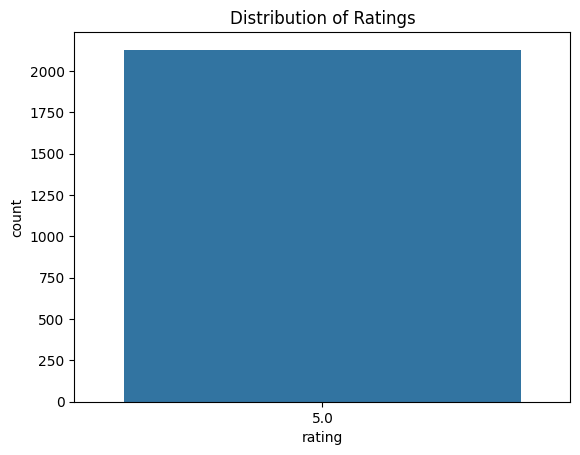

In [50]:
# Distribution of ratings
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

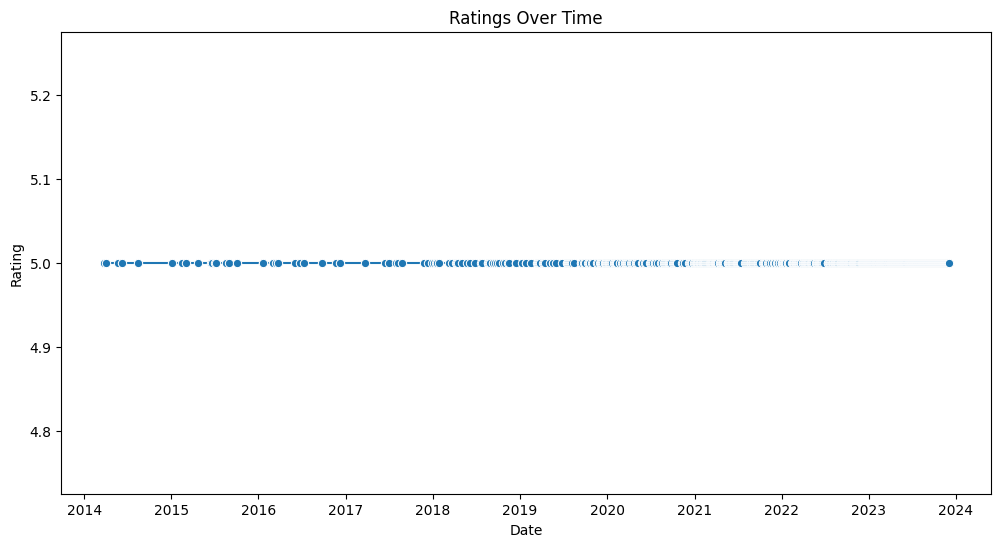

In [51]:
# Time Series Plot for Ratings Over Time
temp_df = df.copy()
temp_df['date'] = pd.to_datetime(temp_df['date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='rating', data=temp_df, marker='o')
plt.title('Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

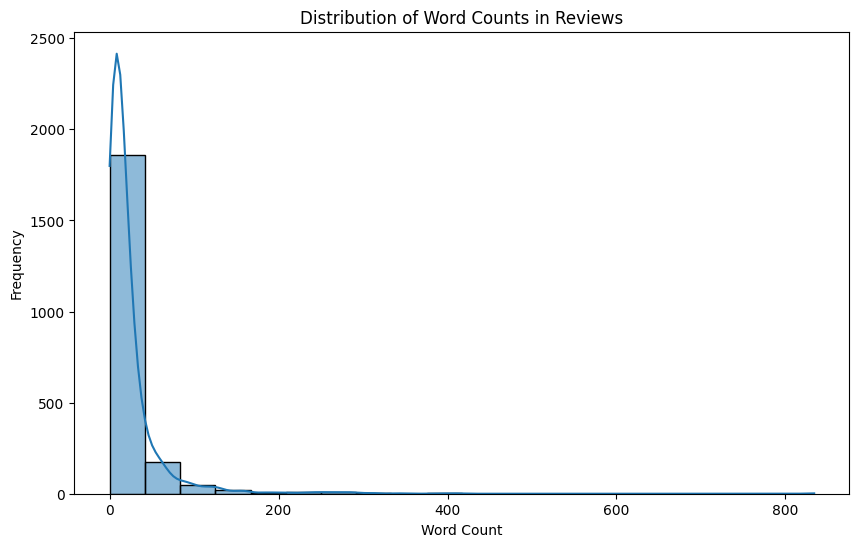

In [52]:
# Distribution of Word Counts in Reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

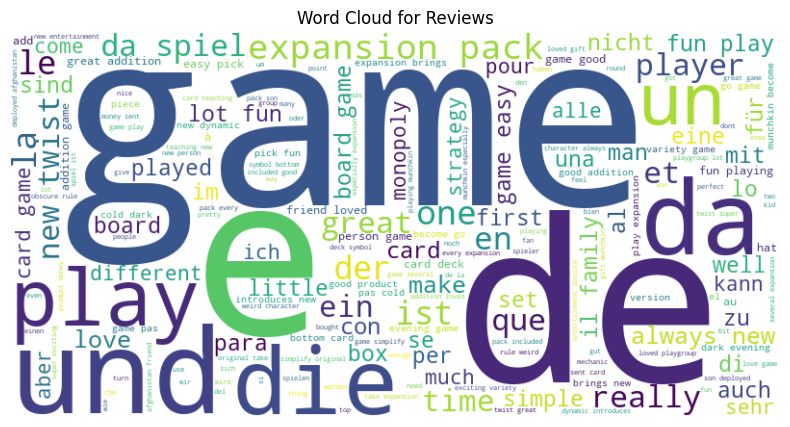

In [54]:
# Word Cloud for visualizing frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

Since the data we obtained is largely only contain positive reviews we decided to use reviews from the amazon which has been previously obtained which contains a lot more varitey of ratings. This was done so that the ML model has more data so that it does not develop a bias towards positive reviews and ML models is more comphrensive in its ability to predict sentiment of the reviews.

Link from which the dataset was accessed - https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews/

In [26]:
train_df = pd.read_csv('./train.csv', header=None, names=['rating','title', 'text'])

def rating(row):
    if row == 2:
        return 1
    else:
        return 0

train_df['rating'] = train_df['rating'].apply(rating)
train_df.head()

,rating,title,text
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [27]:
new_df = df.copy()

def rating(row):
    if row > 3:
        return 1
    else:
        return 0

new_df['rating'] = new_df['rating'].apply(rating)
new_df.head()

,product_id,title,rating,date,text,word_count
0,B089KV9RX7,Pequeño y conveniente,1,2023-12-02,sorprendió el tamaño de la caja e bastante peq...,18
1,B089KV9RX7,Tiny - Stressful - Great,1,2023-11-29,stocking filler boyfriend compact perfect trav...,6
2,B089KV9RX7,great purse game,1,2023-11-20,perfect size throw purse bring place played gr...,19
3,B089KV9RX7,So much fun!,1,2023-11-18,game much fun quick game lot set upclean small...,17
4,B089KV9RX7,Love it!,1,2023-11-18,medium could loadedlove game two four people b...,14


In [28]:
combined_df = pd.concat([new_df[['rating', 'text']], train_df[['rating', 'text']]], ignore_index=True)

In [29]:
combined_df.head()

,rating,text
0,1,sorprendió el tamaño de la caja e bastante peq...
1,1,stocking filler boyfriend compact perfect trav...
2,1,perfect size throw purse bring place played gr...
3,1,game much fun quick game lot set upclean small...
4,1,medium could loadedlove game two four people b...


In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602125 entries, 0 to 3602124
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   rating  int64 
 1   text    object
dtypes: int64(1), object(1)
memory usage: 55.0+ MB


## Task 4: Machine Learning

In [31]:
# Import the required ML libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [25]:
# Text vectorization
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(combined_df['text'])
y = combined_df['rating']

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

d:\Python11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training:
Accuracy: 0.87
F1 Score: 0.87
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87   1439439
           1       0.87      0.88      0.87   1442264

    accuracy                           0.87   2881703
   macro avg       0.87      0.87      0.87   2881703
weighted avg       0.87      0.87      0.87   2881703



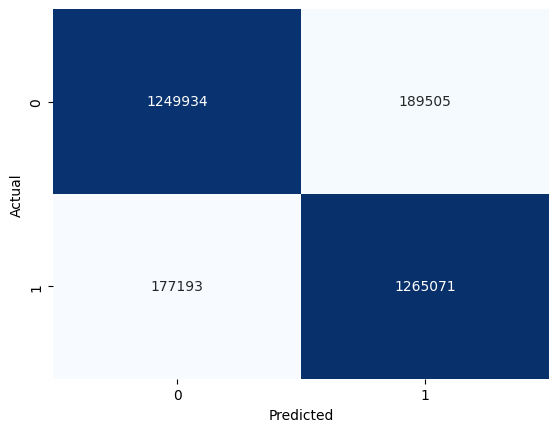

In [80]:
# Model evaluation
# Training
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)
cm_train = confusion_matrix(y_train, y_train_pred) # Confusion matrix

print('Training:')
print(f'Accuracy: {accuracy_train:.2f}')
print(f'F1 Score: {f1_score_train:.2f}')
# Classification report
print(f'Classification Report: \n{classification_report(y_train, y_train_pred)}')
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Testing:
Accuracy: 0.87
F1 Score: 0.87
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    360561
           1       0.87      0.88      0.87    359865

    accuracy                           0.87    720426
   macro avg       0.87      0.87      0.87    720426
weighted avg       0.87      0.87      0.87    720426



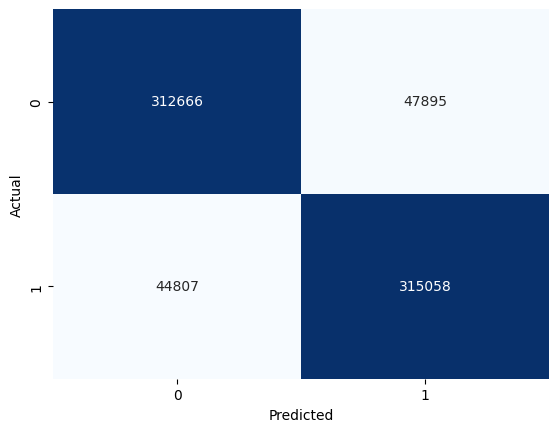

In [82]:
# Testing
# Training
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)
cm_test = confusion_matrix(y_test, y_test_pred) # Confusion matrix

print('Testing:')
print(f'Accuracy: {accuracy_test:.2f}')
print(f'F1 Score: {f1_score_test:.2f}')
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_test_pred)}')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Neural Network Model

In [1]:
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Embedding, Flatten
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Word2Vec embedding
# tokenized_text = [text.split() for text in combined_df['text']]
# word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
# word2vec_model.save("word2vec.model")

In [33]:

# Tokenization
max_words = 10000  # Assuming you want to consider only the top 10,000 words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['text'])
X = tokenizer.texts_to_sequences(combined_df['text'])
X = pad_sequences(X)

# # Create an embedding matrix
# embedding_matrix = np.zeros((max_words, 100))  # Assuming Word2Vec model has vector size 100

# for word, i in tokenizer.word_index.items():
#     if i < max_words:
#         try:
#             embedding_vector = word2vec_model.wv[word]
#             embedding_matrix[i] = embedding_vector
#         except KeyError:
#             # Word not in the Word2Vec model, leave the vector as zeros
#             pass

# Label Encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_df['rating'])

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
max_words = 10000
# Neural Network Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 100)            1000000   
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1006529 (3.84 MB)
Trainable params: 1006529 (3.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model training with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
72043/72043 [==============================] - 533s 7ms/step - loss: 0.2677 - accuracy: 0.8882 - val_loss: 0.2439 - val_accuracy: 0.9007
Epoch 2/20
72043/72043 [==============================] - 437s 6ms/step - loss: 0.2261 - accuracy: 0.9089 - val_loss: 0.2421 - val_accuracy: 0.9016
Epoch 3/20
72043/72043 [==============================] - 439s 6ms/step - loss: 0.1941 - accuracy: 0.9233 - val_loss: 0.2525 - val_accuracy: 0.8989
Epoch 4/20
72043/72043 [==============================] - 448s 6ms/step - loss: 0.1601 - accuracy: 0.9381 - val_loss: 0.2863 - val_accuracy: 0.8928
Epoch 5/20
72043/72043 [==============================] - 465s 6ms/step - loss: 0.1306 - accuracy: 0.9503 - val_loss: 0.3252 - val_accuracy: 0.8883


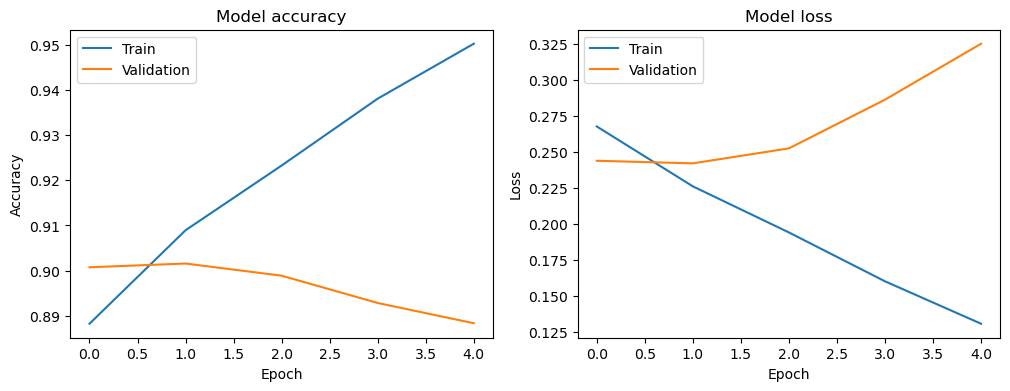

In [37]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

90054/90054 [==============================] - 118s 1ms/step
Neural Network Training:
Accuracy: 0.92
F1 Score: 0.92
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92   1439945
           1       0.92      0.92      0.92   1441755

    accuracy                           0.92   2881700
   macro avg       0.92      0.92      0.92   2881700
weighted avg       0.92      0.92      0.92   2881700



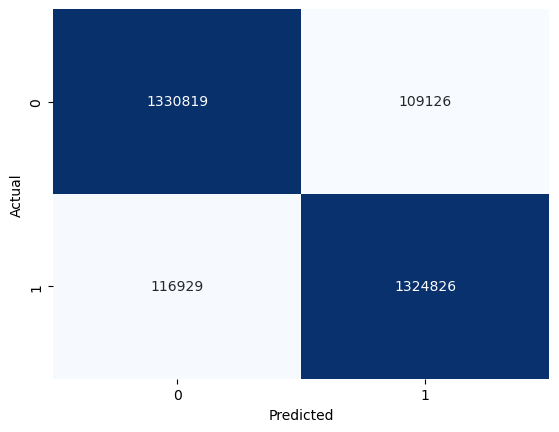

22514/22514 [==============================] - 30s 1ms/step
Neural Network Testing:
Accuracy: 0.90
F1 Score: 0.90
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    360055
           1       0.90      0.90      0.90    360370

    accuracy                           0.90    720425
   macro avg       0.90      0.90      0.90    720425
weighted avg       0.90      0.90      0.90    720425



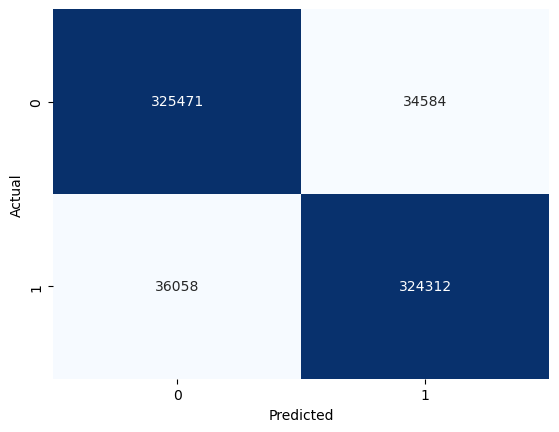

In [38]:
# Model Evaluation
# Training
y_train_pred_nn = (model.predict(np.array(X_train)) > 0.5).astype(int).flatten()
accuracy_train_nn = accuracy_score(y_train, y_train_pred_nn)
f1_score_train_nn = f1_score(y_train, y_train_pred_nn)
cm_train_nn = confusion_matrix(y_train, y_train_pred_nn)

print('Neural Network Training:')
print(f'Accuracy: {accuracy_train_nn:.2f}')
print(f'F1 Score: {f1_score_train_nn:.2f}')
print(f'Classification Report: \n{classification_report(y_train, y_train_pred_nn)}')
sns.heatmap(cm_train_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Testing
y_test_pred_nn = (model.predict(np.array(X_test)) > 0.5).astype(int).flatten()
accuracy_test_nn = accuracy_score(y_test, y_test_pred_nn)
f1_score_test_nn = f1_score(y_test, y_test_pred_nn)
cm_test_nn = confusion_matrix(y_test, y_test_pred_nn)

print('Neural Network Testing:')
print(f'Accuracy: {accuracy_test_nn:.2f}')
print(f'F1 Score: {f1_score_test_nn:.2f}')
print(f'Classification Report: \n{classification_report(y_test, y_test_pred_nn)}')
sns.heatmap(cm_test_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion
This project successfully demonstrated the integration of web crawling, data wrangling, and machine learning techniques for customer sentiment analysis on Amazon product reviews. The developed system provides a valuable tool for businesses to gain insights into customer opinions, contributing to informed decision-making for product improvement and marketing strategies. Future enhancements may include exploring more advanced NLP techniques and expanding the system to analyze reviews from other platforms.